<a href="https://colab.research.google.com/github/Vinicius-DataAnalyst/portfolio/blob/main/09_PROJ_Analise_Series_Temporais_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de series temporais

# Modulos

In [ ]:
# bibliotecas gerais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 # plt.rcParams.update({'figure.figsize' : (9,7), 'figure.dpi' : 120})

In [ ]:
# series temporais
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [ ]:
# carregar dados
dados_eventos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_base/dados_vendas_evento.csv')

In [ ]:
dados_eventos.head()

,data_venda,data_evento,qtd_inscricoes,ticket
0,2017-02-10,2017-09-13,7,1960.357143
1,2017-03-23,2017-09-13,4,1621.750000
2,2017-03-27,2017-09-13,11,1533.583333
3,2017-04-10,2017-09-13,6,2079.166667
4,2017-04-11,2017-09-13,4,1871.250000


# Preparar dados

## Conversao tipo texto em data

In [ ]:
dados_eventos.dtypes

,0
data_venda,object
data_evento,object
qtd_inscricoes,int64
ticket,float64


In [ ]:
# tranformando o dado texto da coluna 'data_evento' para data

dados_eventos[ 'data_venda' ] = pd.to_datetime(dados_eventos[ 'data_venda' ])

In [ ]:
dados_eventos.dtypes

,0
data_venda,datetime64[ns]
data_evento,object
qtd_inscricoes,int64
ticket,float64


## separando um df apenas para analise

In [ ]:
df_analise = dados_eventos[ [ 'data_venda', 'qtd_inscricoes' ] ]
df_analise.sample(5)

,data_venda,qtd_inscricoes
34,2017-07-14,4
50,2017-08-07,12
62,2017-08-23,16
19,2017-06-07,4
40,2017-07-24,4


In [ ]:
df_analise.set_index('data_venda', inplace = True)

In [ ]:
df_analise

,qtd_inscricoes
data_venda,
2017-02-10,7
2017-03-23,4
2017-03-27,11
2017-04-10,6
2017-04-11,4
...,...
2017-09-06,32
2017-09-08,14
2017-09-11,63


# Grafico da serie

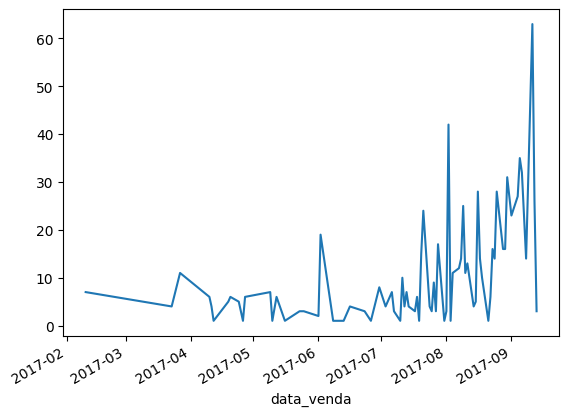

In [ ]:
df_analise.plot( legend = None ) ;

- Verificar estacionariedade

In [ ]:
# teste
teste_adf = adfuller(df_analise['qtd_inscricoes'])
# valor da estatistica
print('Estatística ADF: {:.4}'.format(teste_adf[0]))
# p-value
print('p-value: {:.4}'.format(teste_adf[1]))

Estatística ADF: 0.9259
p-value: 0.9934


nota